In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Principal Component Analysis (PCA)

In this notebook, we will follow the steps to compute PCA based on the mathematical foundation. We will reduce a dataset from 5 variables to 2 principal variables.

## Step 1: Create the Data Matrix

First, let's create the data matrix **X** with n observations and 5 variables.


In [4]:
X = np.random.rand(1000, 5)
X

array([[0.91715479, 0.76832505, 0.25057264, 0.97091985, 0.05402531],
       [0.93372232, 0.10324967, 0.98979217, 0.58476017, 0.88707703],
       [0.25957721, 0.06296462, 0.708292  , 0.11827181, 0.65383188],
       ...,
       [0.02724646, 0.48181639, 0.26766757, 0.84744733, 0.5450295 ],
       [0.37408669, 0.01148355, 0.90894986, 0.64213538, 0.51209642],
       [0.61900331, 0.92241728, 0.9672476 , 0.18156094, 0.42416327]])

## Step 2: Center the Data

To center the data, we subtract the mean of each variable from the corresponding observations.

In [11]:
X_center = X - X.mean(axis=0)

## Step 3: Calculate the Covariance Matrix

The covariance matrix **C** is calculated using the centered data matrix.

In [14]:
C = (X_center.T @ X_center) / X_center.shape[0]-1
C

array([[-0.91397285, -0.99544776, -0.99852738, -1.00207612, -0.99718107],
       [-0.99544776, -0.91700148, -1.00088873, -0.99911074, -0.99760606],
       [-0.99852738, -1.00088873, -0.91513541, -0.9991094 , -1.00022632],
       [-1.00207612, -0.99911074, -0.9991094 , -0.91844187, -1.00282014],
       [-0.99718107, -0.99760606, -1.00022632, -1.00282014, -0.91929154]])

## Step 4: Calculate Eigenvalues and Eigenvectors

The eigenvalues (λ) and eigenvectors (v) of the covariance matrix are calculated. These are used to determine the principal directions of the data.

In [20]:
eigvalues, eigvectors = np.linalg.eig(C)
print("Eigenvalues: ", str(eigvalues))
print("Eigenvectors: ", str(eigvectors))

Eigenvalues:  [-4.91397127  0.08802931  0.07767509  0.08034839  0.08407531]
Eigenvectors:  [[-0.44660863 -0.49670637  0.33936063 -0.60847879  0.26155579]
 [-0.44686314 -0.27892254 -0.72190213 -0.03910601 -0.44703867]
 [-0.44720586  0.51532988 -0.32737008  0.00595453  0.65363248]
 [-0.44789255  0.56322258  0.40541699 -0.13968297 -0.54616694]
 [-0.44749665 -0.30446748  0.30357465  0.78017786  0.07881146]]


## Step 5: Create the Projection Matrix

The projection matrix **V** is composed of the eigenvectors corresponding to the largest eigenvalues. In this case, we select the two largest eigenvalues.


In [33]:
idx_chosen = eigvalues.argsort()[::-1][:2]
V = eigvectors[:,idx_chosen]
V

array([[-0.49670637,  0.26155579],
       [-0.27892254, -0.44703867],
       [ 0.51532988,  0.65363248],
       [ 0.56322258, -0.54616694],
       [-0.30446748,  0.07881146]])

## Step 6: Project the Centered Data

Finally, we project the centered data onto the new lower-dimensional basis using the projection matrix.

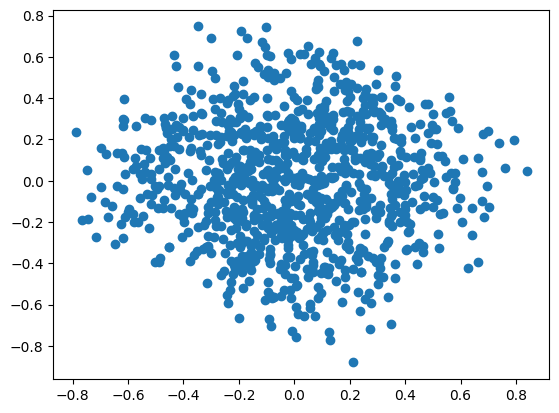

In [47]:
X_pca = X_center @ V

plt.scatter(X_pca[:,0],X_pca[:,1])